In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations

import os

# Concordance Testing Between Toil-rnaseq Versions

John Vivian <br>
2/11/2017

Ensure that the versions of toil-rnaseq are concordant.

TEST_208 = `toil-scripts==2.0.8` <br>
TEST_302 = `toil-rnaseq==3.0.2` <br>
TEST_310 = `toil-rnaseq==3.1.0`

## RSEM

In [4]:
rsem = {}
kallisto = {}
for sample in ['TEST_208', 'TEST_302', 'TEST_310']:
    rsem[sample] = pd.read_csv(sample + '/rsem/rsem_genes.results', sep='\t')
    kallisto[sample] = pd.read_csv(sample + '/kallisto/abundance.tsv', sep='\t')

### 2.0.8 and 3.0.2

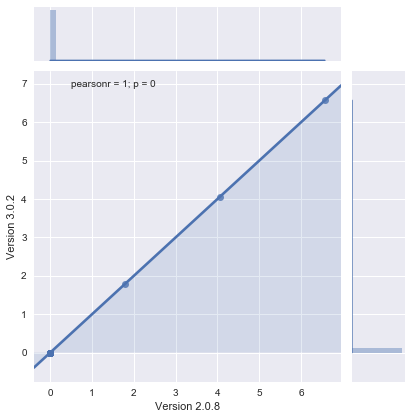

In [4]:
t208 = rsem['TEST_208'].expected_count.apply(lambda x: np.log(x+1))
t302 = rsem['TEST_302'].expected_count.apply(lambda x: np.log(x+1))

sns.jointplot(t208, t302, kind='reg')
plt.xlabel('Version 2.0.8')
plt.ylabel('Version 3.0.2');

### 3.0.2 and 3.1.1

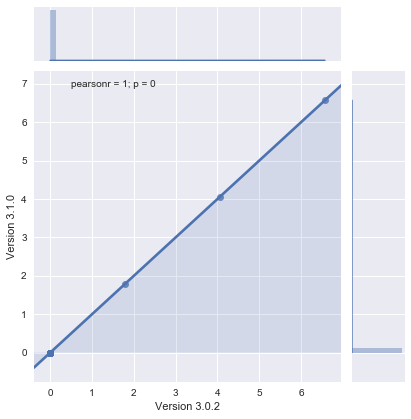

In [5]:
x = rsem['TEST_302'].expected_count.apply(lambda x: np.log(x+1))
y = rsem['TEST_310'].expected_count.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 3.0.2')
plt.ylabel('Version 3.1.0');

By the commutative principle 2.0.8 == 3.1.0

# Kallisto

### 3.0.2 and 3.1.0

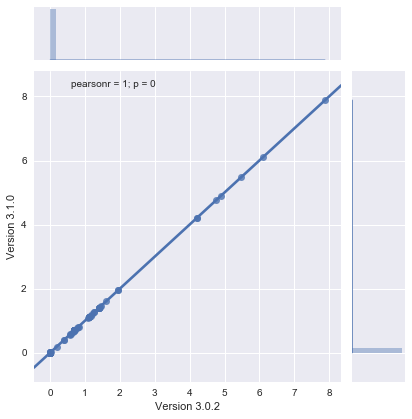

In [6]:
x = kallisto['TEST_302'].est_counts.apply(lambda x: np.log(x+1))
y = kallisto['TEST_310'].est_counts.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 3.0.2')
plt.ylabel('Version 3.1.0');

### 2.0.8 and 3.1.0

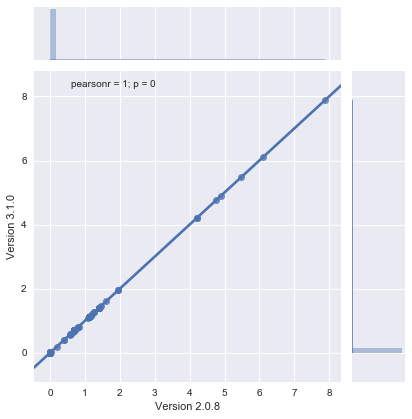

In [7]:
x = kallisto['TEST_208'].est_counts.apply(lambda x: np.log(x+1))
y = kallisto['TEST_310'].est_counts.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 2.0.8')
plt.ylabel('Version 3.1.0');

## A Deeper Look

Given the number of genes we're looking at, concordance testing will swallow up minute differences. Instead we'll take the difference between the expected count set and plot that.


In [17]:
for x, y in combinations(['TEST_208', 'TEST_302', 'TEST_310'], 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print np.nonzero(diff)

TEST_208 TEST_302
(array([], dtype=int64),)
TEST_208 TEST_310
(array([], dtype=int64),)
TEST_302 TEST_310
(array([], dtype=int64),)


### Gerald Test Set

Testing another sample for validation

In [21]:
rsem = {}
kallisto = {}
for sample in ['TEST_gerald_208', 'TEST_gerald_302', 'TEST_gerald_310']:
    rsem[sample] = pd.read_csv(sample + '/rsem/rsem_genes.results', sep='\t')
    kallisto[sample] = pd.read_csv(sample + '/kallisto/abundance.tsv', sep='\t')

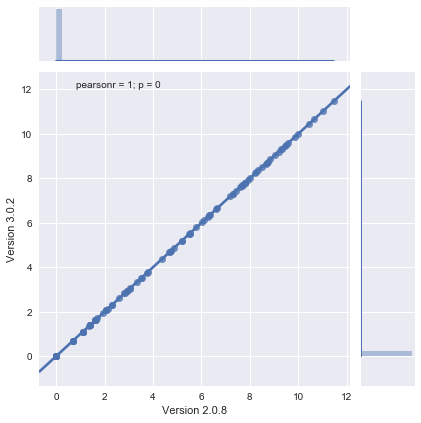

In [22]:
t208 = rsem['TEST_gerald_208'].expected_count.apply(lambda x: np.log(x+1))
t302 = rsem['TEST_gerald_302'].expected_count.apply(lambda x: np.log(x+1))

sns.jointplot(t208, t302, kind='reg')
plt.xlabel('Version 2.0.8')
plt.ylabel('Version 3.0.2');

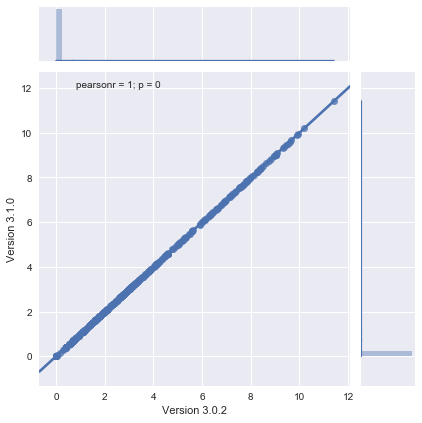

In [27]:
x = kallisto['TEST_gerald_302'].est_counts.apply(lambda x: np.log(x+1))
y = kallisto['TEST_gerald_310'].est_counts.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 3.0.2')
plt.ylabel('Version 3.1.0');

In [25]:
for x, y in combinations(['TEST_gerald_208', 'TEST_gerald_302', 'TEST_gerald_310'], 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print np.nonzero(diff)

TEST_gerald_208 TEST_gerald_302
(array([], dtype=int64),)
TEST_gerald_208 TEST_gerald_310
(array([], dtype=int64),)
TEST_gerald_302 TEST_gerald_310
(array([], dtype=int64),)
